 **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("transactions.xlsx", sheet_name="Transactions")

In [ ]:
df.describe()

,transaction_id,Account_id,transaction_amount,gas_price_purchase,product_id,Location
count,44500.000000,44500.000000,44500.000000,44500.000000,44500.000000,44500.0
mean,22250.500000,1698.967326,26.459262,24.931345,6.666157,7.0
std,12846.187826,543.420426,28.004480,27.375839,3.198977,0.0
min,1.000000,1001.000000,0.000000,0.000000,1.000000,7.0
25%,11125.750000,1251.000000,3.000000,0.000000,4.000000,7.0
50%,22250.500000,1512.000000,3.500000,0.000000,7.000000,7.0
75%,33375.250000,2096.000000,49.260000,49.320000,10.000000,7.0
max,44500.000000,3000.000000,881.090000,89.370000,10.000000,7.0


**Correlation Graph**

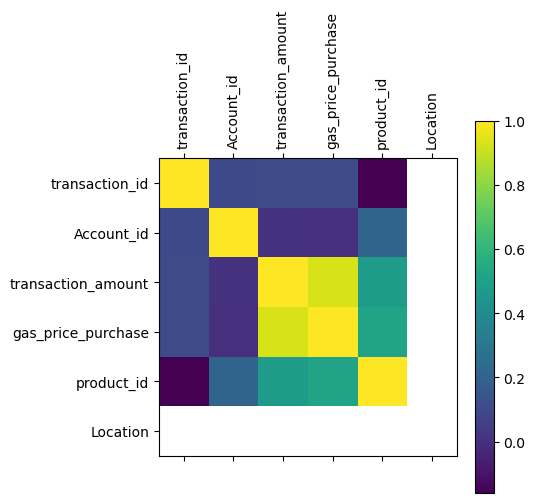

In [ ]:
plt.matshow(df.corr())
continuous_features = df.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation="90")
plt.yticks(range(len(continuous_features)), continuous_features, rotation="0")
plt.colorbar()
plt.show()

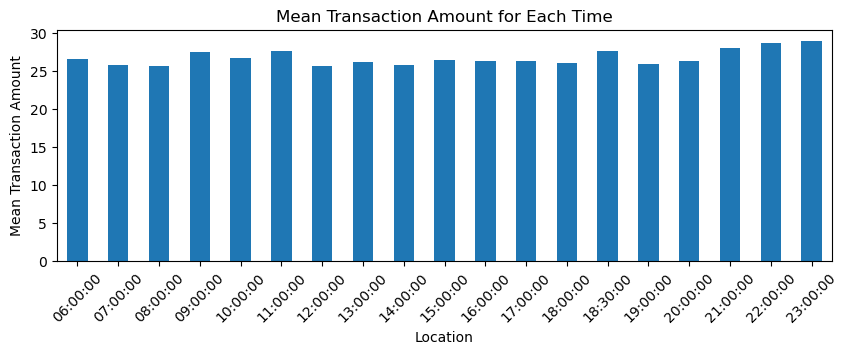

In [ ]:
mean_transaction_amount = df.groupby('time_to_purchase')['transaction_amount'].mean()

# Plot the mean transaction amount for each time
plt.figure(figsize=(10, 3))
mean_transaction_amount.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Mean Transaction Amount')
plt.title('Mean Transaction Amount for Each Time')
plt.xticks(rotation=45)
plt.show()

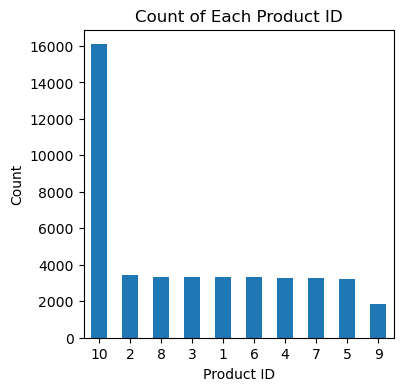

In [ ]:
# Count of each product_id
product_id_counts = df['product_id'].value_counts()

# Plot the count of each product_id
plt.figure(figsize=(4, 4))
product_id_counts.plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Count of Each Product ID')
plt.xticks(rotation=0)
plt.show()

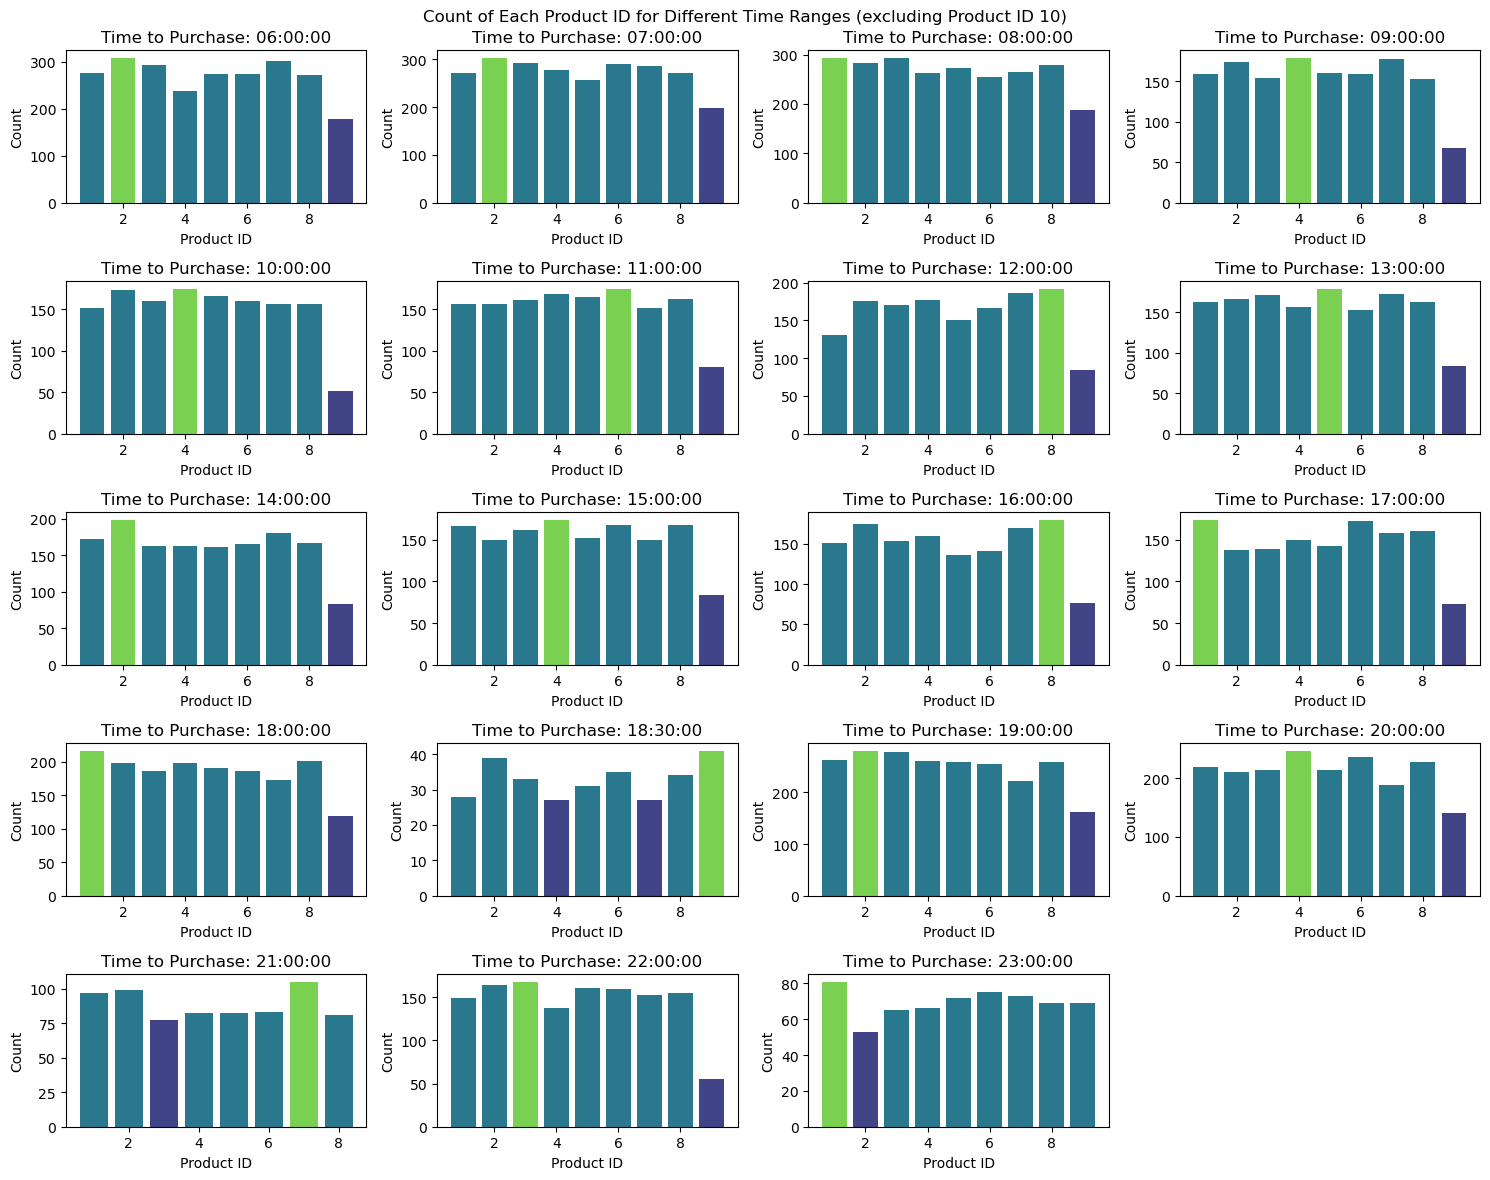

In [ ]:
# Filter out product_id = 10
filtered_data = df[df['product_id'] != 10]

grouped_data = filtered_data.groupby(['time_to_purchase', 'product_id']).size().reset_index(name='count')
# Set Variables
time_to_purchase_values = sorted(filtered_data['time_to_purchase'].unique())
#Setup
num_rows = 5
num_cols = 4
num_subplots = num_rows * num_cols
# Create a graph with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.suptitle('Count of Each Product ID for Different Times (excluding Product ID 10)')
#Setup
colors = sns.color_palette('viridis', n_colors=4)

# Create a subplot
for i, time_to_purchase in enumerate(time_to_purchase_values):
    ax = axs[i // num_cols, i % num_cols]
    data = grouped_data[grouped_data['time_to_purchase'] == time_to_purchase].head(10)
    x = data['product_id']
    y = data['count']

    # Bar Colors
    bar_colors = [colors[-1] if count == y.max() else colors[0] if count == y.min() else colors[1] for count in y]

    ax.bar(x, y, color=bar_colors)
    ax.set_xlabel('Product ID')
    ax.set_ylabel('Count')
    ax.set_title(f'Time to Purchase: {time_to_purchase}')

# Hide any empty subplots
if len(time_to_purchase_values) < num_subplots:
    for j in range(len(time_to_purchase_values), num_subplots):
        ax = axs[j // num_cols, j % num_cols]
        ax.axis('off')

plt.tight_layout()
plt.show()


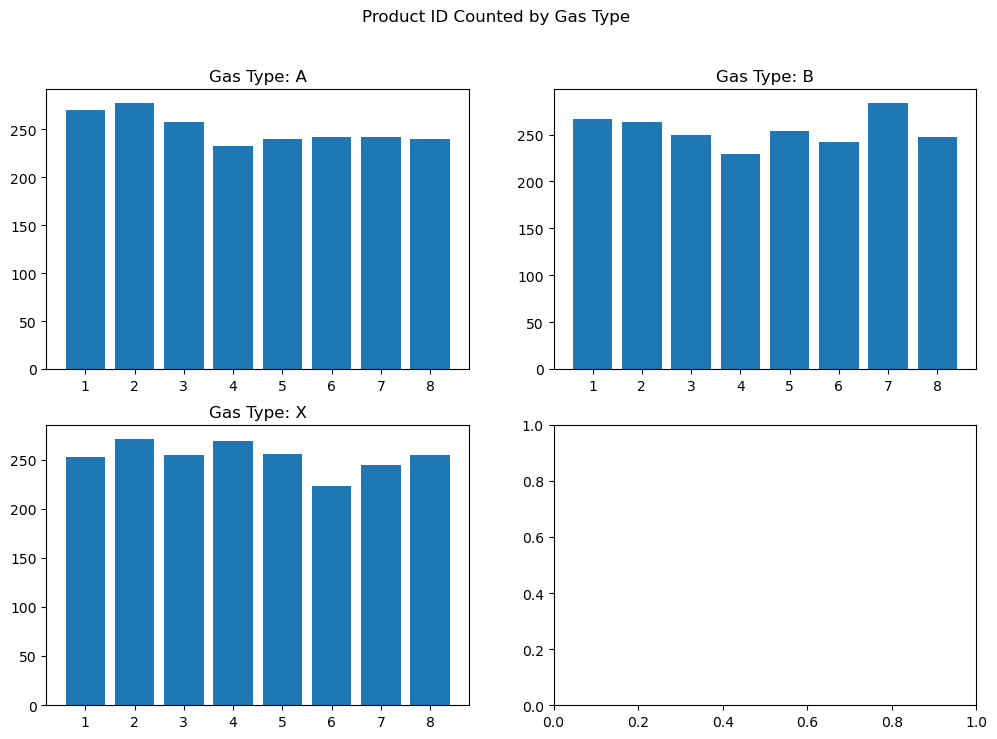

In [ ]:
# Drop rows with missing gas_type values
filtered_data = filtered_data.dropna(subset=['gas_type'])

# Group the filtered data
grouped_data = filtered_data.groupby(['gas_type', 'product_id']).size().reset_index(name='count')

# Get unique gas_type values
gas_types = sorted(filtered_data['gas_type'].unique())

# Setup
num_rows = 2
num_cols = 2

# Subgraph
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Product ID Counted by Gas Type')

# Create subplot
for i, gas_type in enumerate(gas_types):
    ax = axs[i // num_cols, i % num_cols]

    # Filter data
    gas_type_data = grouped_data[grouped_data['gas_type'] == gas_type]

    # Product_id purchased counts
    ax.bar(gas_type_data['product_id'], gas_type_data['count'])
    ax.set_title(f'Gas Type: {gas_type}')
    ax